## **Weather Data Analysis and Forecast Using ARIMA Model**

In [417]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [418]:
!pip install semopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import warnings;
warnings.simplefilter('ignore')

# **Preparing Data**

In [468]:
df1 = pd.read_csv('96745099999.csv')
df2 = pd.read_csv('96745099999 (1).csv')
df3 = pd.read_csv('96745099999 (2).csv')
df4 = pd.read_csv('96745099999 (3).csv')
df5 = pd.read_csv('96745099999 (4).csv')
df6 = pd.read_csv('96745099999 (5).csv')
df7 = pd.read_csv('96745099999 (6).csv')
df8 = pd.read_csv('96745099999 (7).csv')
df9 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True) #gantinya append
#merging datas
df9.columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES', 'MIN',
       'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

In [469]:
print('source: NOAA')

source: NOAA


In [421]:
df10 = df9[['DATE', 'NAME','PRCP', 'TEMP']] #just use this column
df10.head() 

,DATE,NAME,PRCP,TEMP
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4


In [422]:
df10['temp(c)'] = (df10['TEMP'] - 32)*5/9 #changing to celcius
df10['prcp'] = df10['PRCP']*25.4 #changing to mm
df10.head()

,DATE,NAME,PRCP,TEMP,temp(c),prcp
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5,26.388889,7.112
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6,26.444444,29.972
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8,26.000000,8.890
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4,25.777778,2.032
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4,28.000000,0.000


In [423]:
df10['month'] = df10['DATE'].str.slice(0,7) #making new column 'bulan'
df10.head()

,DATE,NAME,PRCP,TEMP,temp(c),prcp,month
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5,26.388889,7.112,2015-01
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6,26.444444,29.972,2015-01
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8,26.000000,8.890,2015-01
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4,25.777778,2.032,2015-01
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4,28.000000,0.000,2015-01


In [424]:
df10.isna().sum()

DATE       0
NAME       0
PRCP       0
TEMP       0
temp(c)    0
prcp       0
month      0
dtype: int64

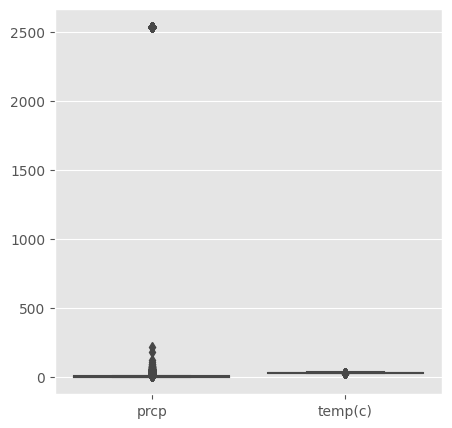

In [425]:
ax = sns.boxplot(data = df10[['prcp', 'temp(c)']])

**Handling Outlier**

In [426]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [427]:
low, high = outlier(df10['prcp'])
low2, high2 = outlier(df10['temp(c)'])

In [428]:
#replacing outlier with upper bound and lower bound value
df10['prcp'] = np.where(df10['prcp']>high, high, df10['prcp'])
df10['prcp'] = np.where(df10['prcp']<low, low, df10['prcp'])

df10['temp(c)'] = np.where(df10['temp(c)']>high2, high2, df10['temp(c)'])
df10['temp(c)'] = np.where(df10['temp(c)']<low2, low2, df10['temp(c)'])

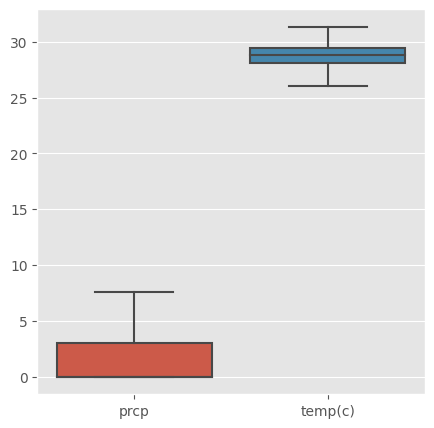

In [429]:
ax = sns.boxplot(data = df10[['prcp','temp(c)']])

In [430]:
df10_1 = df10[['DATE', 'NAME', 'prcp', 'temp(c)', 'month']]

# **Correlation**

In [431]:
# Convert dataframe into series
list1 = df10_1['temp(c)']
list2 = df10_1['prcp']
 
# Apply the pearsonr()
nett = 0
corr, _ = pearsonr(list1, list2)

print('Pearsons correlation: %.3f' % corr)
if corr < 0:
    print('have opposite corellation')
if corr > 0:
    print('have linear corellation')
if corr == 0:
    print('have no corellation')
else:
    print('')

Pearsons correlation: -0.507
have opposite corellation



In [432]:
#correlation table
df10_1.corr()

,prcp,temp(c)
prcp,1.000000,-0.507244
temp(c),-0.507244,1.000000


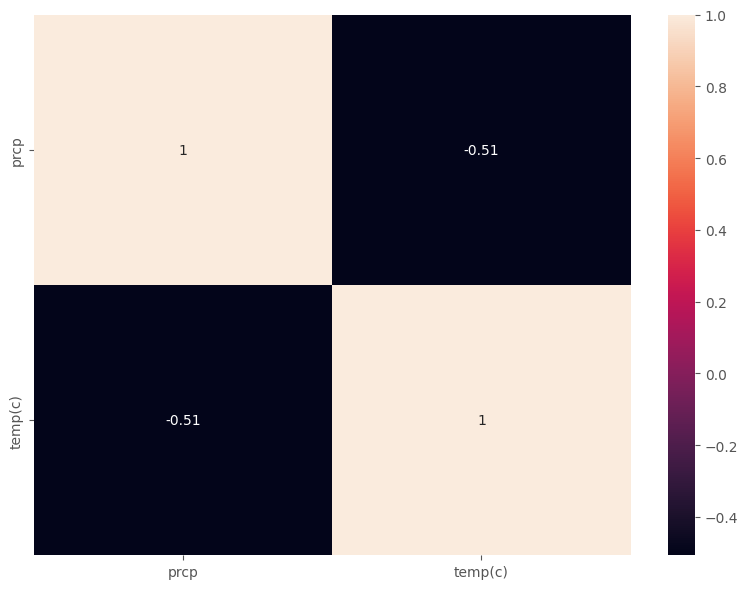

In [433]:
#correlation heatmap
plt.figure(figsize=(8,6))
#sns.set_theme('notebook', style='white')
plt.style.use('ggplot')
sns.heatmap(df10_1.corr(), annot=True, fmt='.2g')
plt.tight_layout()
plt.show()

# **Data Visualization**

In [434]:
df11 = df10.groupby('month')['prcp', 'temp(c)'].agg({'prcp': 'sum', 'temp(c)':'mean'}).reset_index()
df11['month'].astype('datetime64[ns]')
df11

,month,prcp,temp(c)
0,2015-01,97.028,27.198925
1,2015-02,118.618,27.055556
2,2015-03,93.218,27.850000
3,2015-04,55.880,28.640741
4,2015-05,21.336,29.367384
...,...,...,...
91,2022-08,25.400,29.195341
92,2022-09,39.116,28.811111
93,2022-10,79.756,28.401852
94,2022-11,67.564,28.381481


In [435]:
from matplotlib import style #I just want to know the available style, hehe.
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'Precitipation (mm)')

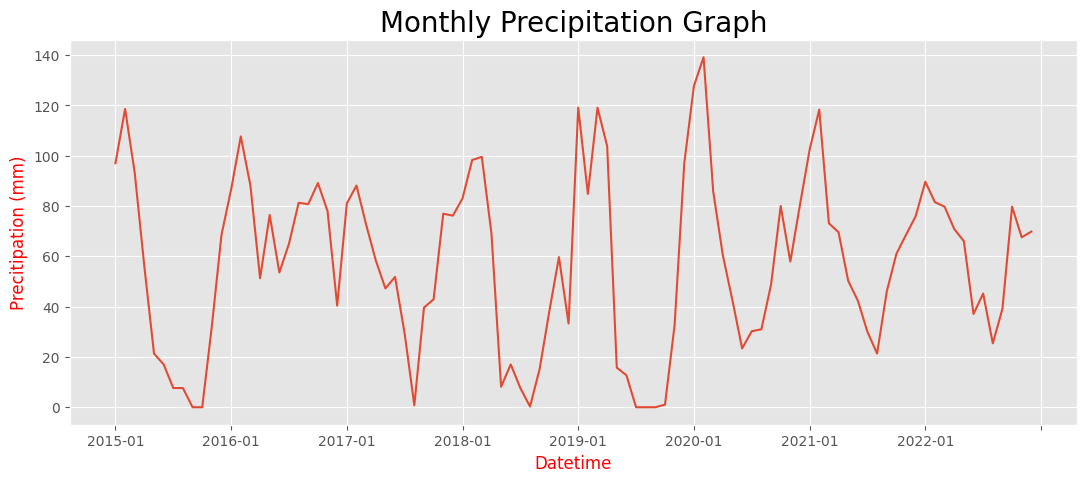

In [436]:
#ine chart example
import matplotlib.ticker as plticker

plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(df11['month'], df11['prcp'], linewidth=1.5)
plt.title('Monthly Precipitation Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(12)) #mengubah interval xticks to 2 years interval
plt.xlabel('Datetime', color = 'r')
plt.ylabel('Precitipation (mm)', color = 'r')

Text(0, 0.5, 'Temperature (Celcius)')

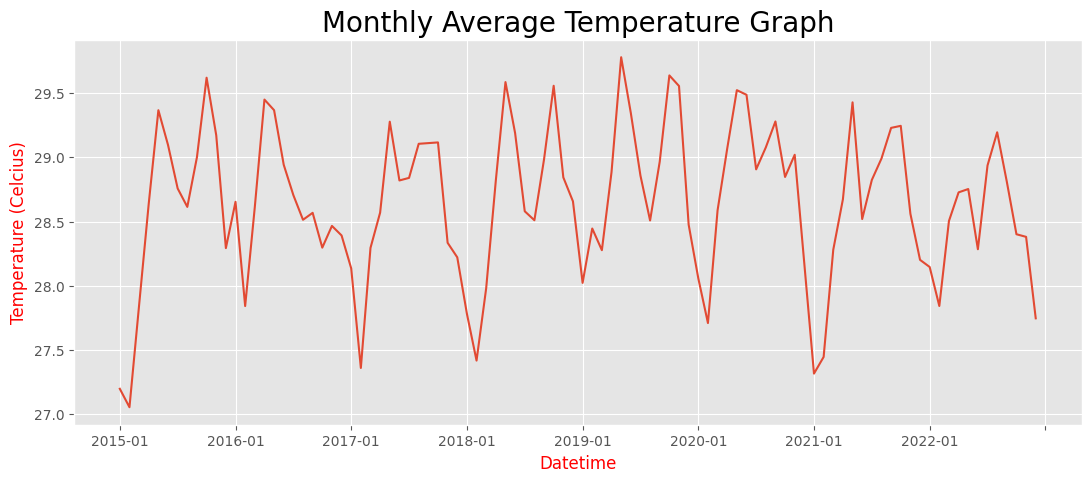

In [437]:
#linechart example
plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(df11['month'], df11['temp(c)'], linewidth=1.5)
plt.title('Monthly Average Temperature Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(12)) #mengubah interval xticks to 2 years interval
plt.xlabel('Datetime', color = 'r')
plt.ylabel('Temperature (Celcius)', color = 'r')

# **Forecasting Precipitation**

In [438]:
df10_1['month'] = df10_1['DATE'].str.slice(0,7)
df10.head()

,DATE,NAME,PRCP,TEMP,temp(c),prcp,month
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5,26.388889,7.112,2015-01
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6,26.444444,7.620,2015-01
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8,26.055556,7.620,2015-01
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4,26.055556,2.032,2015-01
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4,28.000000,0.000,2015-01


In [439]:
from statsmodels.tsa.seasonal import seasonal_decompose
df10_1['DATE'] = pd.to_datetime(df10_1['DATE'])
df10_1.dtypes

DATE       datetime64[ns]
NAME               object
prcp              float64
temp(c)           float64
month              object
dtype: object

In [440]:
df11 = df10_1.groupby('month')['prcp', 'temp(c)'].agg({'prcp': 'sum', 'temp(c)':'mean'}).reset_index()
df11

,month,prcp,temp(c)
0,2015-01,97.028,27.198925
1,2015-02,118.618,27.055556
2,2015-03,93.218,27.850000
3,2015-04,55.880,28.640741
4,2015-05,21.336,29.367384
...,...,...,...
91,2022-08,25.400,29.195341
92,2022-09,39.116,28.811111
93,2022-10,79.756,28.401852
94,2022-11,67.564,28.381481


In [441]:
df11.set_index('month', inplace=True)

In [442]:
df11.index.freq = 'MS'
df11

,prcp,temp(c)
month,,
2015-01,97.028,27.198925
2015-02,118.618,27.055556
2015-03,93.218,27.850000
2015-04,55.880,28.640741
2015-05,21.336,29.367384
...,...,...
2022-08,25.400,29.195341
2022-09,39.116,28.811111
2022-10,79.756,28.401852


<Axes: xlabel='month'>

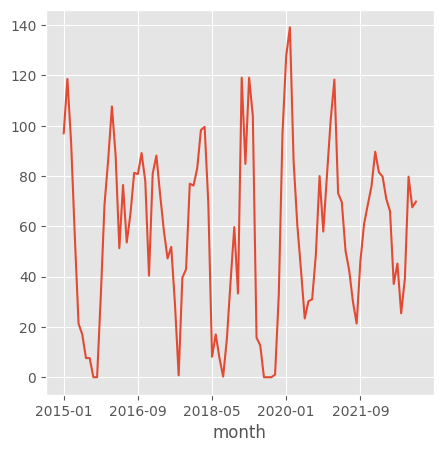

In [443]:
import matplotlib.pyplot as plt
df11['prcp'].plot()

**Train data before predicting**

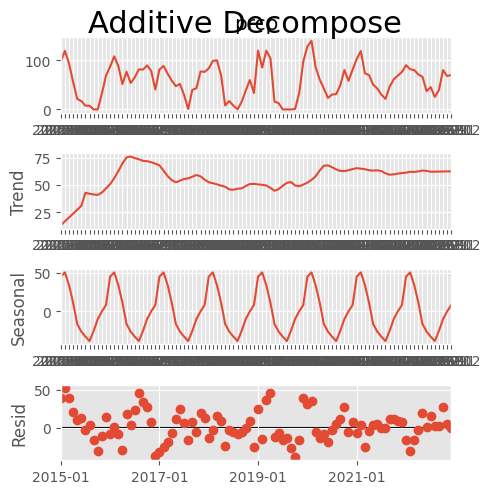

In [444]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df11['prcp'], model='additive', extrapolate_trend='freq', period=12)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(24))
plt.show()

In [445]:
from pmdarima import auto_arima
auto_arima(df11['prcp'], seasonal = True, m = 24).summary() #m refers to the number of periods in each season
#this is the best period i've use

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -424.762
Date:                Mon, 10 Apr 2023   AIC                            863.523
Time:                        05:47:14   BIC                            881.474
Sample:                    01-01-2015   HQIC                           870.779
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.1963      1.332     11.409      0.000      12.586      17.807
ar.L1          1.6942      0.033     50.783      0.000       1.629       1.760
ar.L2         -0.9602      0.032    -30.344      0.000      -1.022      -0.898
ma.L1         -1.1345      0.099    -11.448      0.000      -1.329      -0.940
ma.L2          0.2954      0.150      1.975      0.048       0.002       0.589
ma.L3          0.2237      0.100      2.233      0.026       0.027       0.420
sigma2       405.8318     62.286      6.516      0.000     283.753     527.911
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.83   Prob(JB):                         0.62
Heteroskedasticity (H):               0.44   Skew:                            -0.23
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [446]:
#perform data partitioning
n=len(df11)
n

96

In [447]:
start_index = n-24
start_index

72

In [448]:
train = df11.iloc[:-24]
test = df11.iloc[-24:]
test.head()

,prcp,temp(c)
month,,
2021-01,102.362,27.317204
2021-02,118.364,27.446759
2021-03,73.152,28.281362
2021-04,69.596,28.674074
2021-05,50.292,29.428315


In [449]:
len(test)

24

In [450]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['prcp'], order = (2, 0, 3), seasonal_order=(2, 0, 1, 24)) #this is the best period i've use
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 prcp   No. Observations:                   72
Model:             SARIMAX(2, 0, 3)x(2, 0, [1], 24)   Log Likelihood                -331.509
Date:                              Mon, 10 Apr 2023   AIC                            681.018
Time:                                      05:47:20   BIC                            701.508
Sample:                                  01-01-2015   HQIC                           689.175
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4681      0.643      2.285      0.022       0.209       2.727
ar.L2         -0.4695      0.437     -1.075      0.283      -1.326       0.387
ma.L1         -0.8099      0.585     -1.384      0.166      -1.957       0.337
ma.L2          0.0962      0.196      0.490      0.624      -0.289       0.481
ma.L3         -0.2647      0.175     -1.509      0.131      -0.609       0.079
ar.S.L24       0.7073      0.428      1.651      0.099      -0.132       1.547
ar.S.L48       0.2908      0.383      0.759      0.448      -0.460       1.042
ma.S.L24      -0.9326      2.053     -0.454      0.650      -4.957       3.092
sigma2       336.7119    568.046      0.593      0.553    -776.637    1450.061
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.90   Prob(JB):                         0.76
Heteroskedasticity (H):               1.86   Skew:                            -0.16
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

if p value are low, its ok!

In [451]:
start = len(train)
end = len(train)+len(test)-1

predict = results.predict(start = start, end = end, dynamic = False, type='level')
predict.reset_index()

,index,predicted_mean
0,2021-01-01,95.968221
1,2021-02-01,104.875800
2,2021-03-01,83.037363
3,2021-04-01,61.115153
4,2021-05-01,41.472584
5,2021-06-01,41.009772
6,2021-07-01,28.080357
7,2021-08-01,16.280948
8,2021-09-01,29.631657
9,2021-10-01,30.955460


In [452]:
#compare prediction and expected value
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print(rmse(test["prcp"], predict))

""" Have tried many models, and this is the best model """

13.451194312266871


' Have tried many models, and this is the best model '

In [453]:
from datetime import datetime

dates = ['11-2019', '12-2019', '01-2020']
dates = [datetime.strptime(x, '%m-%Y') for x in dates]

In [454]:
test2 = test.reset_index()
"""
error happened before, so I reset it

"""

'\nerror happened before, so I reset it\n\n'

In [455]:
test2.columns

Index(['month', 'prcp', 'temp(c)'], dtype='object')

In [456]:
test2['month'] = test2['month'].astype('datetime64[ns]')
test2

,month,prcp,temp(c)
0,2021-01-01,102.362,27.317204
1,2021-02-01,118.364,27.446759
2,2021-03-01,73.152,28.281362
3,2021-04-01,69.596,28.674074
4,2021-05-01,50.292,29.428315
5,2021-06-01,42.418,28.520370
6,2021-07-01,29.972,28.824373
7,2021-08-01,21.336,28.991039
8,2021-09-01,45.974,29.229630
9,2021-10-01,60.960,29.245520


In [457]:
test2.set_index('month', inplace=True)

In [458]:
test2.index.freq = 'MS'
test

,prcp,temp(c)
month,,
2021-01,102.362,27.317204
2021-02,118.364,27.446759
2021-03,73.152,28.281362
2021-04,69.596,28.674074
2021-05,50.292,29.428315
2021-06,42.418,28.520370
2021-07,29.972,28.824373
2021-08,21.336,28.991039
2021-09,45.974,29.229630


<Axes: xlabel='month'>

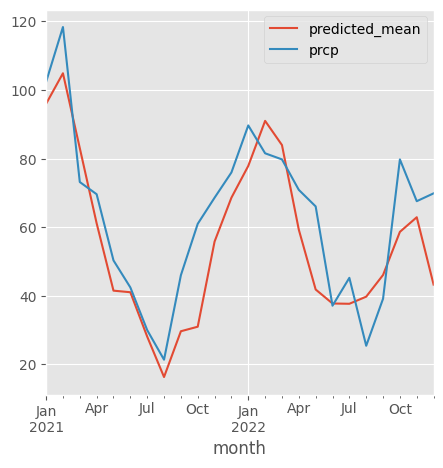

In [459]:
predict.plot(legend = True)
test2['prcp'].plot(legend = True)

In [460]:
"""you can see, this model can follow up the low and high trends. 
 Different from other models I've used because those models aren't 
 strong enough to follow up the high trends."""

"you can see, this model can follow up the low and high trends. \n Different from other models I've used because those models aren't \n strong enough to follow up the high trends."

**Predict data**

In [461]:
model = SARIMAX(df11['prcp'], order = (2, 0, 3), seasonal_order=(2, 0, 1, 24))
results2 = model.fit()
fore = results2.predict(len(df11), len(df11)+24, typ = 'levels').rename('SARIMAX forecast') #predict nest 2 years

In [462]:
fore

2023-01-01    111.018403
2023-02-01    104.813693
2023-03-01    103.149916
2023-04-01     80.570025
2023-05-01     35.022781
2023-06-01     33.202907
2023-07-01     17.067353
2023-08-01      6.958824
2023-09-01     14.943134
2023-10-01     15.041603
2023-11-01     44.222896
2023-12-01     75.221322
2024-01-01     90.886968
2024-02-01    106.329351
2024-03-01     82.260622
2024-04-01     54.531258
2024-05-01     33.118812
2024-06-01     26.230403
2024-07-01     26.893501
2024-08-01     30.820814
2024-09-01     40.258652
2024-10-01     59.175388
2024-11-01     55.971953
2024-12-01     46.808078
2025-01-01     89.296297
Freq: MS, Name: SARIMAX forecast, dtype: float64

In [463]:
df11 = df11.reset_index()

In [464]:
df11['month'] = pd.to_datetime(df11['month'])

Text(0, 0.5, 'Precitipation (mm)')

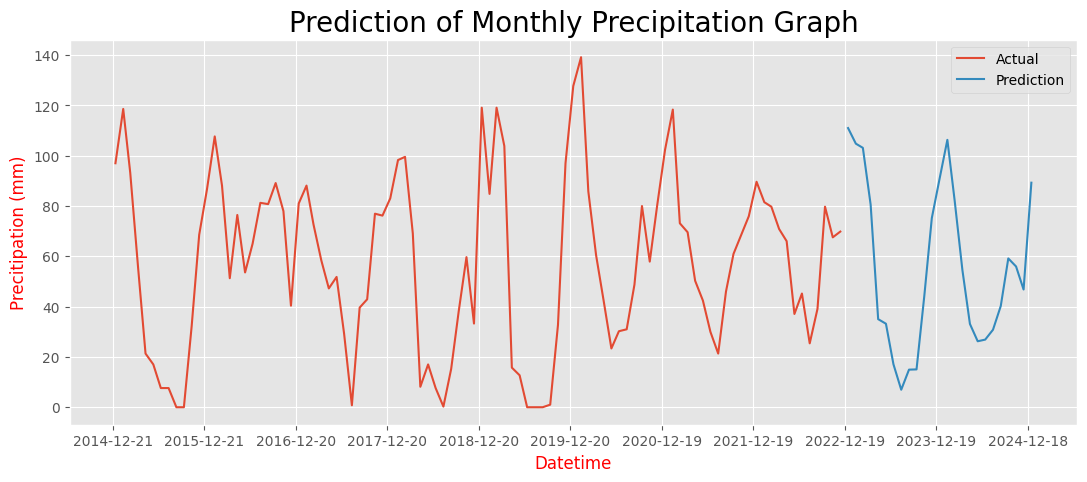

In [465]:
plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(df11['month'], df11['prcp'], linewidth=1.5, label='Actual')
plt.plot(fore, linewidth=1.5, label = 'Prediction')
plt.legend()
plt.title('Prediction of Monthly Precipitation Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365)) #mengubah interval xticks to 1 year interval
plt.xlabel('Datetime', color = 'r')
plt.ylabel('Precitipation (mm)', color = 'r')

**This graph can't be 100% correct, yo!**

because there is another variable that can influence precipitation trends, like La Nina, El Nino, temperature, HARP, God's Decision, etc.

RMSE = 13.5